REQUIRED LIBRARIES

### Create Directory for Output Images

In [31]:
import os
import matplotlib.pyplot as plt

output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)
print(f"Created directory: {output_dir}")

Created directory: output_images


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

LOAD MNIST DATASET

In [33]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


DATA PREPROCESSING

In [34]:
# Convert pixel values to float and normalize to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten images from (28,28) into (784,)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Preserve original y_test labels for evaluation
y_test_original = y_test.copy()

# One-hot encode training and testing labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


print("DATA SHAPES (AFTER PREPROCESSING)")
print("Flattened Training Data Shape:", X_train.shape)
print("Flattened Test Data Shape:", X_test.shape)
print("One-hot Encoded Labels Shape:", y_train.shape)

DATA SHAPES (AFTER PREPROCESSING)
Flattened Training Data Shape: (60000, 784)
Flattened Test Data Shape: (10000, 784)
One-hot Encoded Labels Shape: (60000, 10)


DISPLAY INITIAL TRAINING SAMPLES

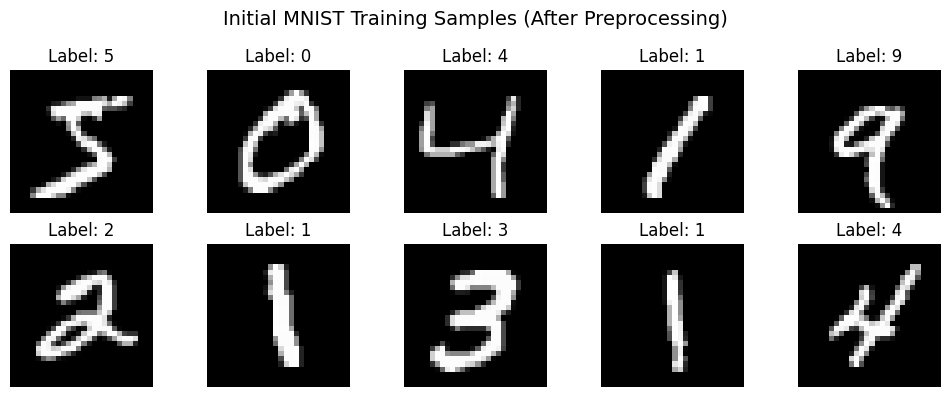

In [46]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.suptitle("Initial MNIST Training Samples (After Preprocessing)", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "initial_training_samples.png"))
plt.show()

BUILD ANN MODEL FUNCTION (6 HIDDEN LAYERS)

In [36]:
def build_model(hidden_activation="sigmoid"):
    model = Sequential()

    # Hidden Layer 1
    model.add(Dense(512, activation=hidden_activation, input_shape=(784,)))

    # Hidden Layer 2
    model.add(Dense(256, activation=hidden_activation))

    # Hidden Layer 3
    model.add(Dense(128, activation=hidden_activation))

    # Hidden Layer 4
    model.add(Dense(64, activation=hidden_activation))

    # Hidden Layer 5
    model.add(Dense(32, activation=hidden_activation))

    # Hidden Layer 6
    model.add(Dense(16, activation=hidden_activation))

    # Output Layer (Softmax for probability distribution)
    model.add(Dense(10, activation="softmax"))

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


TRAIN SIGMOID MODEL

In [37]:
sigmoid_model = build_model("sigmoid")

print("TRAINING MODEL: SIGMOID ACTIVATION")

history_sigmoid = sigmoid_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

sigmoid_loss, sigmoid_acc = sigmoid_model.evaluate(X_test, y_test, verbose=0)

print("SIGMOID MODEL TEST RESULTS")
print(f"Test Accuracy: {sigmoid_acc:.4f}")
print(f"Test Loss: {sigmoid_loss:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TRAINING MODEL: SIGMOID ACTIVATION
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.2115 - loss: 2.1050 - val_accuracy: 0.4885 - val_loss: 1.3227
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5106 - loss: 1.2408 - val_accuracy: 0.6428 - val_loss: 0.9484
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6642 - loss: 0.9027 - val_accuracy: 0.7945 - val_loss: 0.6641
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8041 - loss: 0.6250 - val_accuracy: 0.8722 - val_loss: 0.4603
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8889 - loss: 0.4366 - val_accuracy: 0.9475 - val_loss: 0.3021
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9510 - loss: 0.2774 - val_accuracy: 0.9635 - val_loss: 0.2131
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9622 - loss: 0.2009 - val_accuracy: 0.9660 - val_loss: 0.1713
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc

TRAIN TANH MODEL

In [38]:
tanh_model = build_model("tanh")

print("TRAINING MODEL: TANH ACTIVATION")

history_tanh = tanh_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

tanh_loss, tanh_acc = tanh_model.evaluate(X_test, y_test, verbose=0)

print("TANH MODEL TEST RESULTS")
print(f"Test Accuracy: {tanh_acc:.4f}")
print(f"Test Loss: {tanh_loss:.4f}")

TRAINING MODEL: TANH ACTIVATION


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8504 - loss: 0.6946 - val_accuracy: 0.9605 - val_loss: 0.1672
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9552 - loss: 0.1751 - val_accuracy: 0.9678 - val_loss: 0.1235
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9707 - loss: 0.1129 - val_accuracy: 0.9712 - val_loss: 0.1084
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9743 - loss: 0.0912 - val_accuracy: 0.9760 - val_loss: 0.0921
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9816 - loss: 0.0649 - val_accuracy: 0.9730 - val_loss: 0.1065
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9841 - loss: 0.0563 - val_accuracy: 0.9742 - val_loss: 0.1016
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9851 - loss: 0.0512 - val_accuracy: 0.9755 - val_loss: 0.0934
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9881 - loss: 0.0409 - val_ac

PLOT TRAINING CURVES (ACCURACY + LOSS)

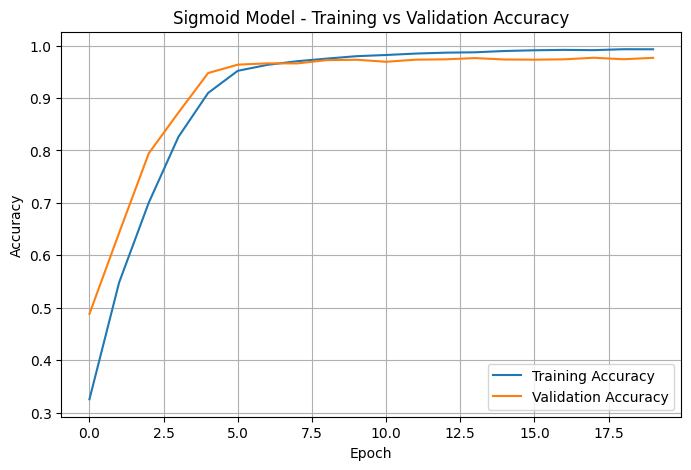

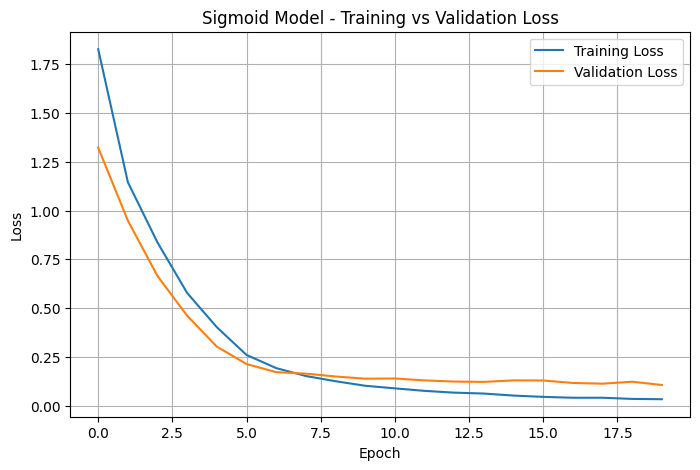

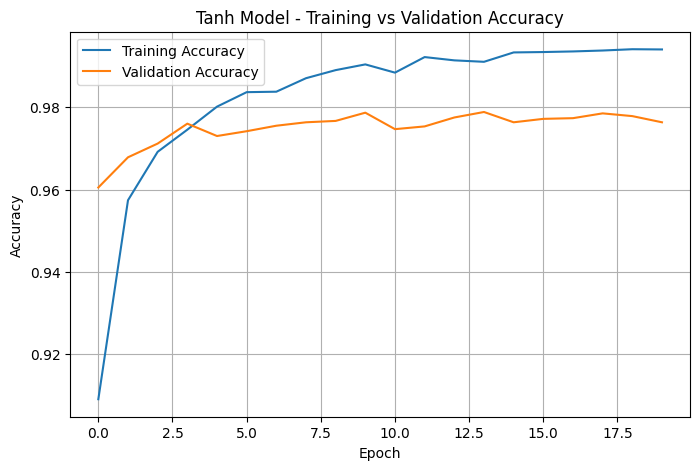

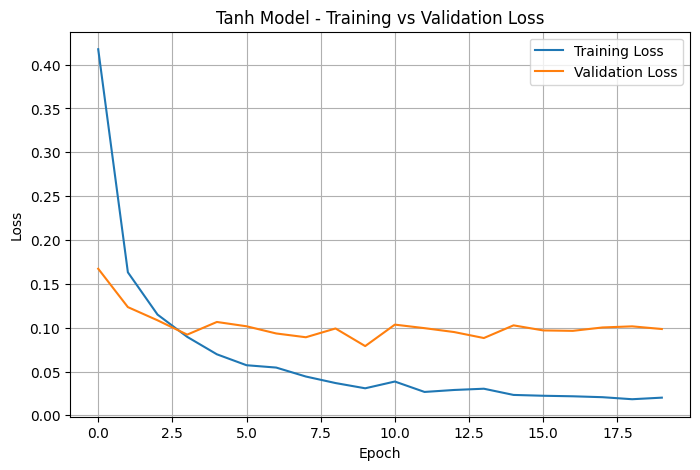

In [47]:
def plot_training_curves(history, title_prefix):
    # Accuracy Plot
    plt.figure(figsize=(8, 5))
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{title_prefix} - Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"{title_prefix.replace(' ', '_').lower()}_accuracy_curve.png"))
    plt.show()

    # Loss Plot
    plt.figure(figsize=(8, 5))
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{title_prefix} - Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"{title_prefix.replace(' ', '_').lower()}_loss_curve.png"))
    plt.show()


plot_training_curves(history_sigmoid, "Sigmoid Model")
plot_training_curves(history_tanh, "Tanh Model")

CONFUSION MATRIX + CLASSIFICATION REPORT

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


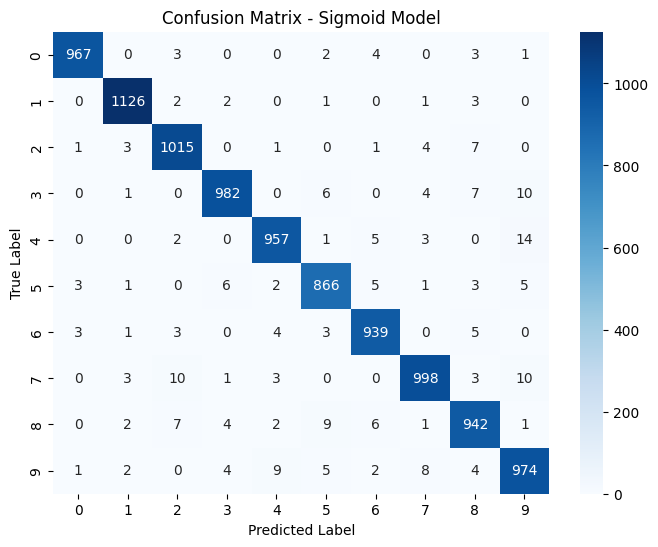


  CLASSIFICATION REPORT - Sigmoid Model


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


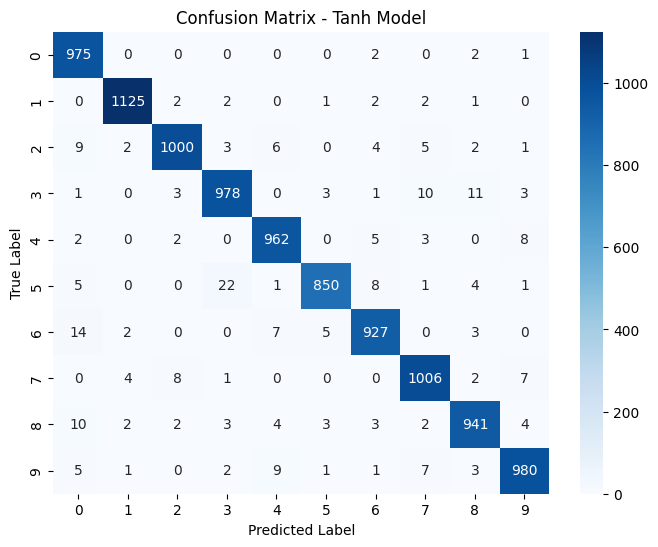


  CLASSIFICATION REPORT - Tanh Model


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.95      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [48]:
def plot_confusion_matrix(model, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_test_original, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig(os.path.join(output_dir, f"{model_name.replace(' ', '_').lower()}_confusion_matrix.png"))
    plt.show()


    print(f"\n  CLASSIFICATION REPORT - {model_name}")
    print("\n")

    print(classification_report(y_test_original, y_pred_classes))


plot_confusion_matrix(sigmoid_model, "Sigmoid Model")
plot_confusion_matrix(tanh_model, "Tanh Model")

RANDOM PREDICTIONS WITH CONFIDENCE SCORES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


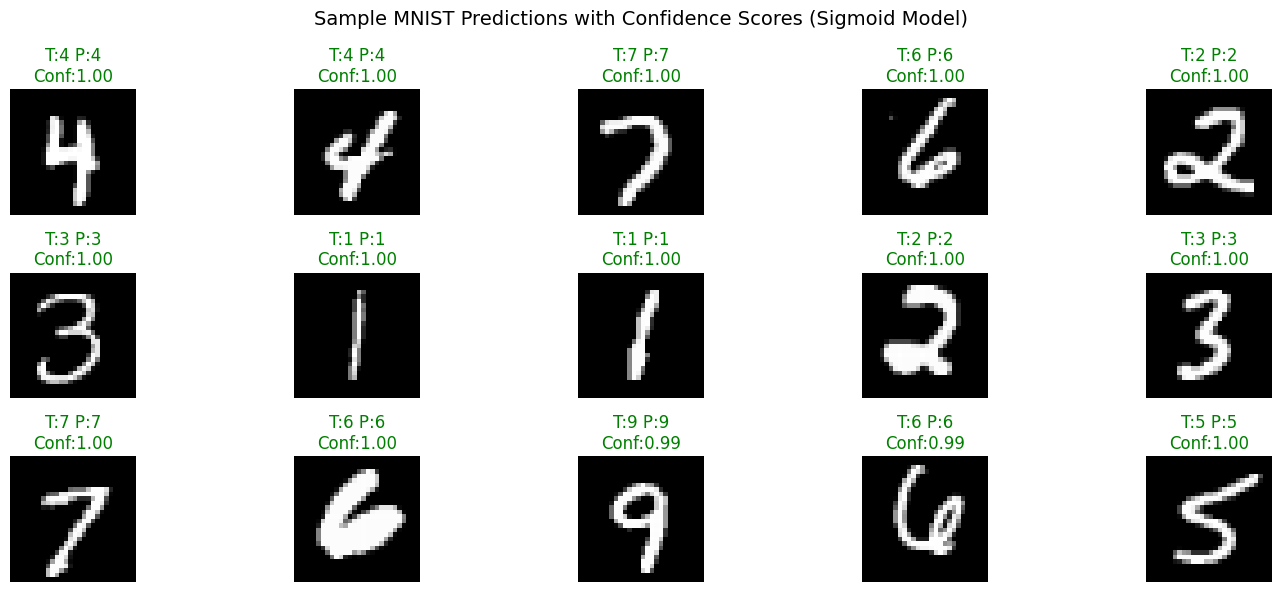

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


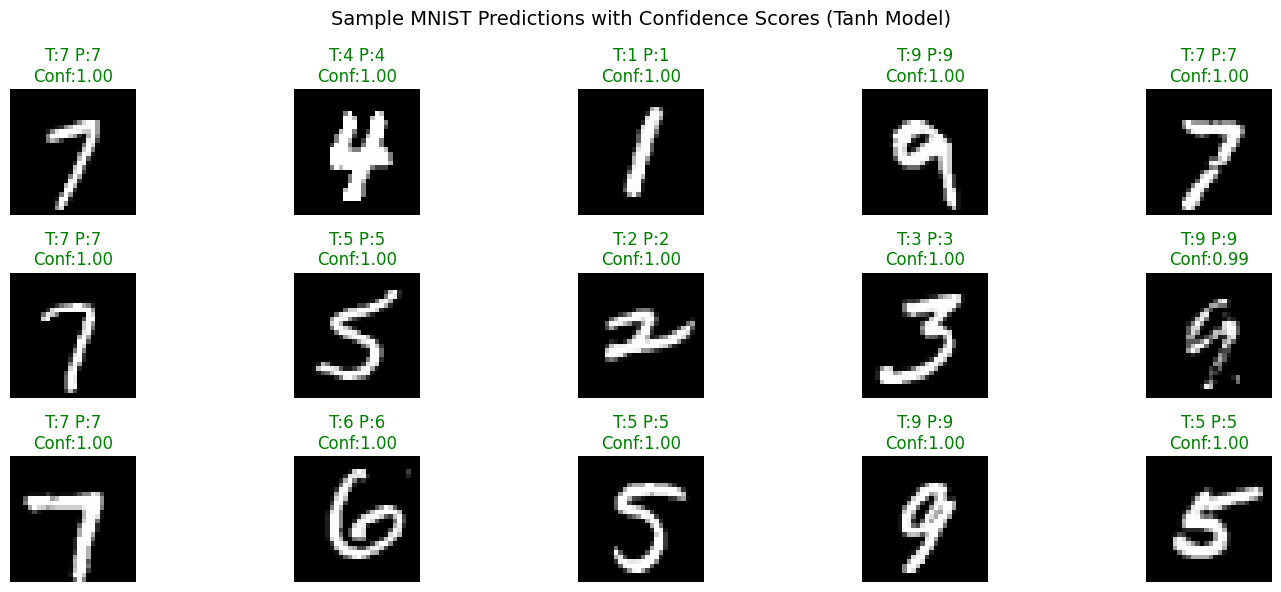

In [49]:
def plot_predictions_with_confidence(model, model_name, n_samples=15):
    random_indices = np.random.choice(len(X_test), n_samples, replace=False)

    pred_probs = model.predict(X_test[random_indices])
    pred_classes = np.argmax(pred_probs, axis=1)
    confidences = np.max(pred_probs, axis=1)

    true_classes = y_test_original[random_indices]

    plt.figure(figsize=(15, 6))

    for i, idx in enumerate(random_indices):
        plt.subplot(3, 5, i+1)

        img = X_test[idx].reshape(28, 28)
        plt.imshow(img, cmap="gray")

        pred = pred_classes[i]
        true = true_classes[i]
        conf = confidences[i]

        title_color = "green" if pred == true else "red"
        plt.title(f"T:{true} P:{pred}\nConf:{conf:.2f}", color=title_color)
        plt.axis("off")

    plt.suptitle(f"Sample MNIST Predictions with Confidence Scores ({model_name})", fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{model_name.replace(' ', '_').lower()}_random_predictions.png"))
    plt.show()


plot_predictions_with_confidence(sigmoid_model, "Sigmoid Model")
plot_predictions_with_confidence(tanh_model, "Tanh Model")

INCORRECT PREDICTIONS WITH CONFIDENCE SCORES

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
TOTAL INCORRECT PREDICTIONS (Sigmoid Model): 234




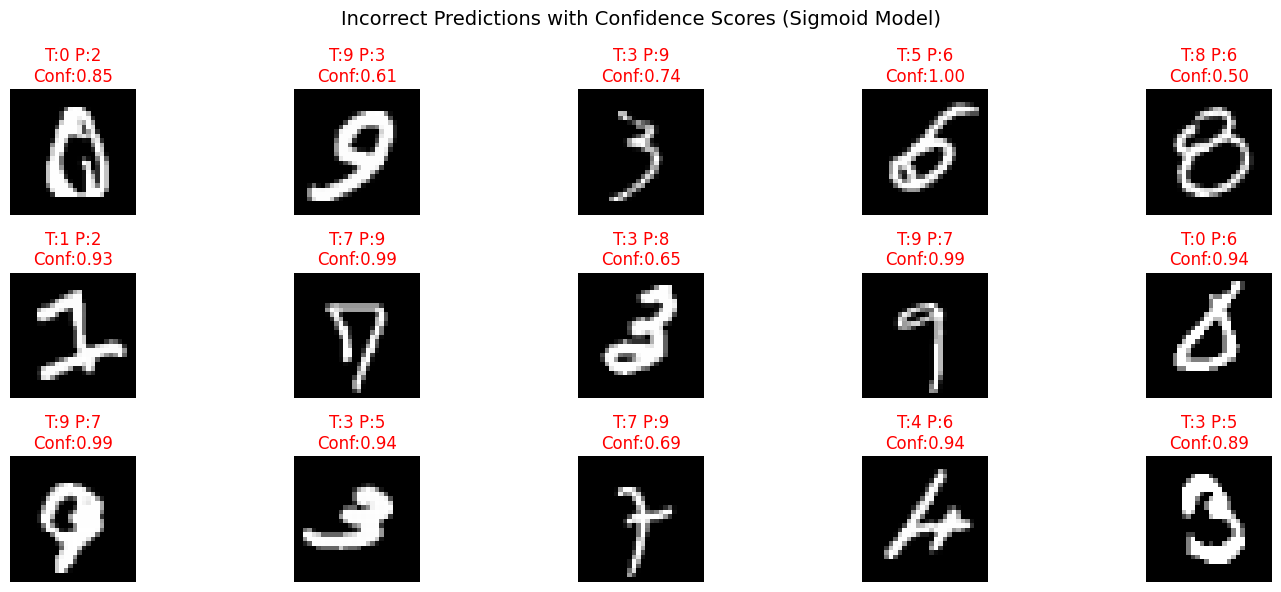

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
TOTAL INCORRECT PREDICTIONS (Tanh Model): 256




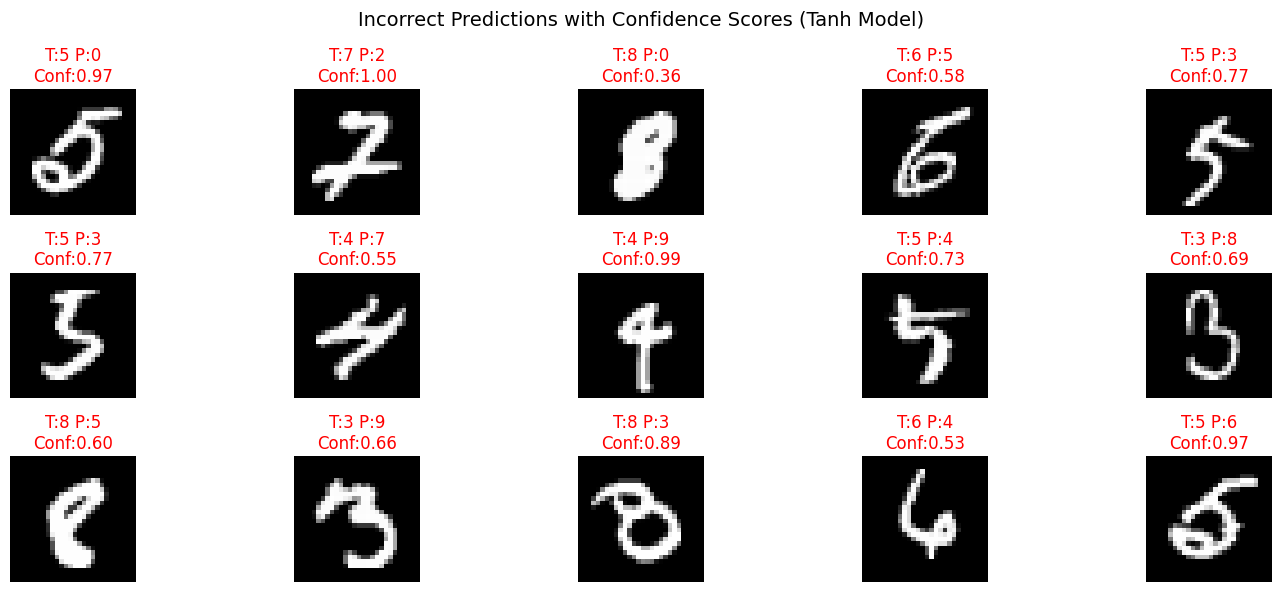

In [50]:
def plot_incorrect_predictions(model, model_name, n_wrong=15):
    all_probs = model.predict(X_test)
    all_preds = np.argmax(all_probs, axis=1)
    all_conf = np.max(all_probs, axis=1)

    incorrect_idx = np.where(all_preds != y_test_original)[0]


    print(f"TOTAL INCORRECT PREDICTIONS ({model_name}): {len(incorrect_idx)}")
    print("\n")

    chosen_wrong = np.random.choice(incorrect_idx, n_wrong, replace=False)

    plt.figure(figsize=(15, 6))

    for i, idx in enumerate(chosen_wrong):
        plt.subplot(3, 5, i+1)

        img = X_test[idx].reshape(28, 28)
        plt.imshow(img, cmap="gray")

        true = y_test_original[idx]
        pred = all_preds[idx]
        conf = all_conf[idx]

        plt.title(f"T:{true} P:{pred}\nConf:{conf:.2f}", color="red")
        plt.axis("off")

    plt.suptitle(f"Incorrect Predictions with Confidence Scores ({model_name})", fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{model_name.replace(' ', '_').lower()}_incorrect_predictions.png"))
    plt.show()


plot_incorrect_predictions(sigmoid_model, "Sigmoid Model")
plot_incorrect_predictions(tanh_model, "Tanh Model")

CONFIDENCE DISTRIBUTION ANALYSIS

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


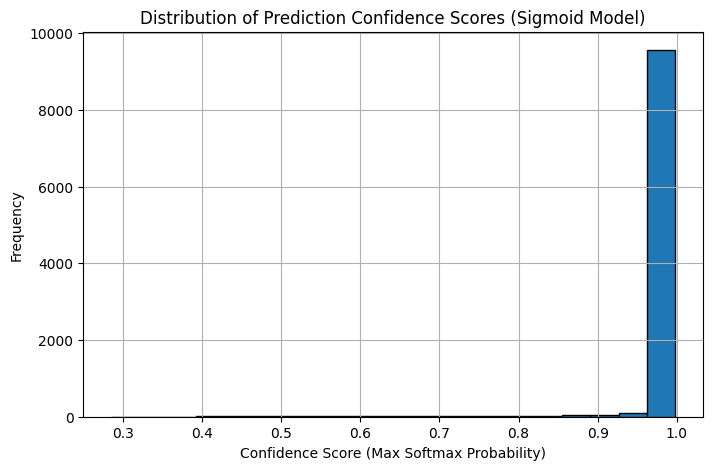

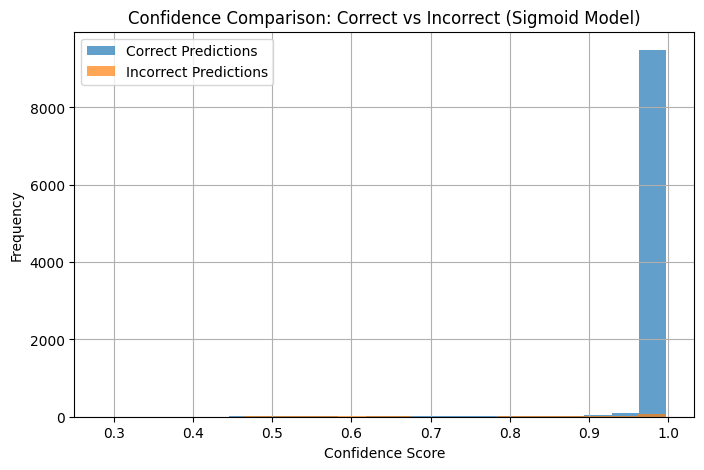

AVERAGE CONFIDENCE SUMMARY (Sigmoid Model)


Average Confidence (Correct): 0.9900
Average Confidence (Incorrect): 0.7897
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


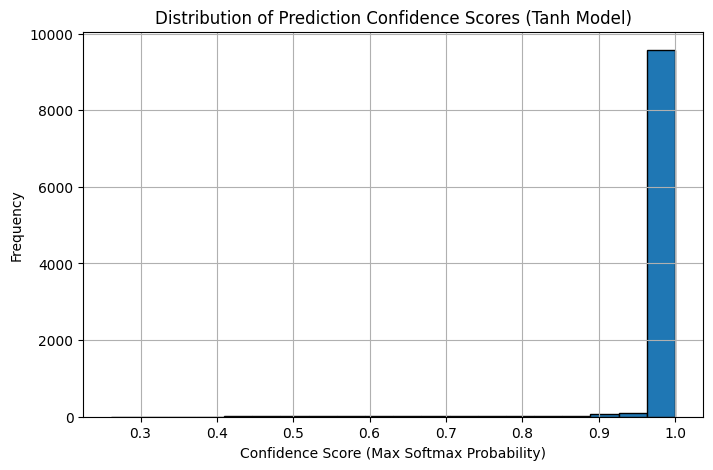

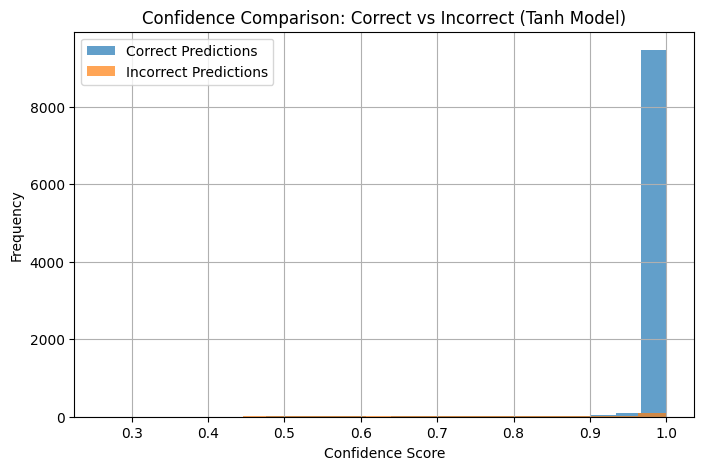

AVERAGE CONFIDENCE SUMMARY (Tanh Model)


Average Confidence (Correct): 0.9937
Average Confidence (Incorrect): 0.8182


In [51]:
def confidence_analysis(model, model_name):
    all_probs = model.predict(X_test)
    all_preds = np.argmax(all_probs, axis=1)
    all_conf = np.max(all_probs, axis=1)

    correct_mask = (all_preds == y_test_original)

    # Overall Confidence Distribution
    plt.figure(figsize=(8, 5))
    plt.hist(all_conf, bins=20, edgecolor="black")
    plt.title(f"Distribution of Prediction Confidence Scores ({model_name})")
    plt.xlabel("Confidence Score (Max Softmax Probability)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"{model_name.replace(' ', '_').lower()}_confidence_distribution.png"))
    plt.show()

    # Correct vs Incorrect Confidence Distribution
    plt.figure(figsize=(8, 5))
    plt.hist(all_conf[correct_mask], bins=20, alpha=0.7, label="Correct Predictions")
    plt.hist(all_conf[~correct_mask], bins=20, alpha=0.7, label="Incorrect Predictions")
    plt.title(f"Confidence Comparison: Correct vs Incorrect ({model_name})")
    plt.xlabel("Confidence Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"{model_name.replace(' ', '_').lower()}_correct_incorrect_confidence.png"))
    plt.show()

    avg_conf_correct = np.mean(all_conf[correct_mask])
    avg_conf_incorrect = np.mean(all_conf[~correct_mask])


    print(f"AVERAGE CONFIDENCE SUMMARY ({model_name})")
    print("\n")
    print(f"Average Confidence (Correct): {avg_conf_correct:.4f}")
    print(f"Average Confidence (Incorrect): {avg_conf_incorrect:.4f}")

    return all_conf, all_preds


sigmoid_conf, sigmoid_preds = confidence_analysis(sigmoid_model, "Sigmoid Model")
tanh_conf, tanh_preds = confidence_analysis(tanh_model, "Tanh Model")

CONFIDENCE HISTOGRAM OVERLAY (SIGMOID VS TANH)

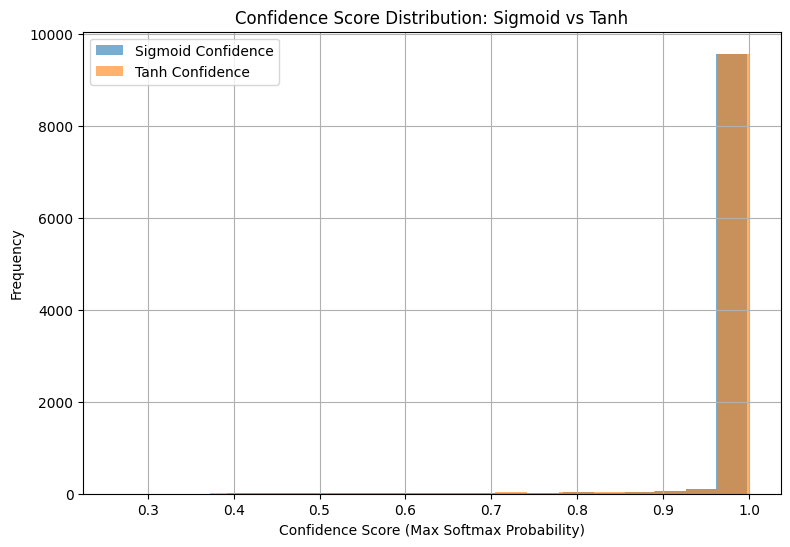

In [52]:
plt.figure(figsize=(9, 6))
plt.hist(sigmoid_conf, bins=20, alpha=0.6, label="Sigmoid Confidence")
plt.hist(tanh_conf, bins=20, alpha=0.6, label="Tanh Confidence")
plt.title("Confidence Score Distribution: Sigmoid vs Tanh")
plt.xlabel("Confidence Score (Max Softmax Probability)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, "sigmoid_tanh_confidence_overlay.png"))
plt.show()

AVERAGE CONFIDENCE COMPARISON (CORRECT VS INCORRECT)

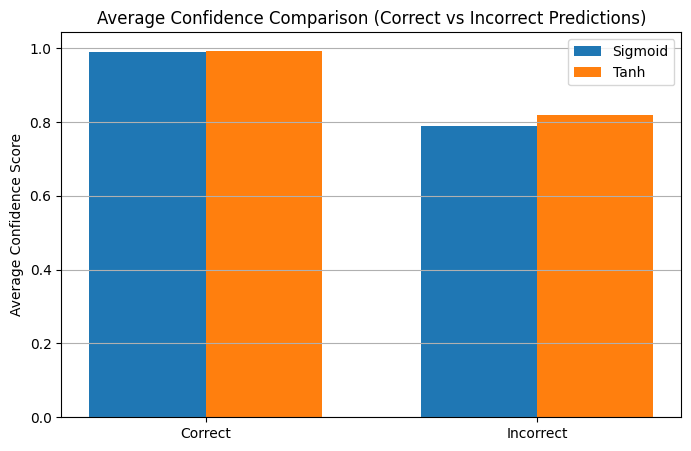



FINAL AVERAGE CONFIDENCE COMPARISON


Sigmoid Avg Confidence (Correct):   0.9900
Sigmoid Avg Confidence (Incorrect): 0.7897
Tanh Avg Confidence (Correct):      0.9937
Tanh Avg Confidence (Incorrect):    0.8182


In [53]:
sigmoid_correct_mask = (sigmoid_preds == y_test_original)
tanh_correct_mask = (tanh_preds == y_test_original)

sigmoid_avg_conf_correct = np.mean(sigmoid_conf[sigmoid_correct_mask])
sigmoid_avg_conf_incorrect = np.mean(sigmoid_conf[~sigmoid_correct_mask])

tanh_avg_conf_correct = np.mean(tanh_conf[tanh_correct_mask])
tanh_avg_conf_incorrect = np.mean(tanh_conf[~tanh_correct_mask])

labels = ["Correct", "Incorrect"]
sigmoid_values = [sigmoid_avg_conf_correct, sigmoid_avg_conf_incorrect]
tanh_values = [tanh_avg_conf_correct, tanh_avg_conf_incorrect]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, sigmoid_values, width, label="Sigmoid")
plt.bar(x + width/2, tanh_values, width, label="Tanh")

plt.xticks(x, labels)
plt.title("Average Confidence Comparison (Correct vs Incorrect Predictions)")
plt.ylabel("Average Confidence Score")
plt.legend()
plt.grid(axis="y")
plt.savefig(os.path.join(output_dir, "avg_confidence_comparison.png"))
plt.show()

print("\n")
print("FINAL AVERAGE CONFIDENCE COMPARISON")
print("\n")
print(f"Sigmoid Avg Confidence (Correct):   {sigmoid_avg_conf_correct:.4f}")
print(f"Sigmoid Avg Confidence (Incorrect): {sigmoid_avg_conf_incorrect:.4f}")
print(f"Tanh Avg Confidence (Correct):      {tanh_avg_conf_correct:.4f}")
print(f"Tanh Avg Confidence (Incorrect):    {tanh_avg_conf_incorrect:.4f}")